### 1.Imports necessary libraries for data manipulation, visualization, and preprocessing.
### 2.Suppresses warnings to keep the output clean.
### 3.Loads the dataset Mudra_loan.csv into a Pandas DataFrame.
### 4.Displays the first five rows of the dataset using df.head().

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("Mudra_loan.csv")
df.head()

,ID,Date_Of_Disbursement,Business,Jobs_Reatained,Jobs_Created,Year_Of_Commitment,Guaranteed_Approved _Loan,Borrower_Name,Low_Documentation_Loan,Demography,...,Classification_Code,Loan_Approved_Gross,Gross_Amount_Disbursed,Loan_Term,Commitment_Date,Primary_Loan_Digit,Code_Franchise,Name_Of_Bank,Revolving_Credit_Line,Default
0,0,31-Jul-91,Existing,0,0,1991,Rs.33121600.0,STANDARD PARTS CORPORATION,No,Undefined,...,0,Rs.40640000.0,Rs.40640000.0,126,2-Apr-91,4419763001,1,Axis Bank Ltd.,No,0
1,1,30-Apr-06,New,0,6,2006,Rs.32735520.0,FRANK & KERI AMESTOY,No,Urban,...,451120,Rs.43647360.0,Rs.43647360.0,123,10-Apr-06,1709796003,1,Bandhan Bank Ltd.,0,1
2,2,30-Jun-04,Existing,4,0,2004,Rs.1422400.0,TELECOMMQC L L C,No,Urban,...,541618,Rs.2844800.0,Rs.5961400.32,90,25-May-04,7464754008,1,CSB Bank Limited,Yes,0
3,3,31-Jan-06,New,9,1,2006,Rs.2032000.0,"K & A AUTOMOTIVE, INC. DBA MUF",No,Urban,...,811112,Rs.4064000.0,Rs.4064000.0,126,21-Dec-05,1588745006,0,City Union Bank Ltd.,Yes,0
4,4,31-Dec-04,Existing,4,0,2005,Rs.22981920.0,SUNBEAM DELI,No,Urban,...,722211,Rs.30642560.0,Rs.30642560.0,104,2-Nov-04,8037734002,1,DCB Bank Ltd.,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         105000 non-null  int64 
 1   Date_Of_Disbursement       104765 non-null  object
 2   Business                   104985 non-null  object
 3   Jobs_Reatained             105000 non-null  int64 
 4   Jobs_Created               105000 non-null  int64 
 5   Year_Of_Commitment         105000 non-null  object
 6   Guaranteed_Approved _Loan  105000 non-null  object
 7   Borrower_Name              104997 non-null  object
 8   Low_Documentation_Loan     104633 non-null  object
 9   Demography                 105000 non-null  object
 10  State_Of_Bank              105000 non-null  object
 11  ChargedOff_Amount          105000 non-null  object
 12  Borrower_City              105000 non-null  object
 13  Borrower_State             105000 non-null  

In [3]:
df.describe()

,ID,Jobs_Reatained,Jobs_Created,Count_Employees,Classification_Code,Loan_Term,Primary_Loan_Digit,Code_Franchise,Default
count,105000.00000,105000.000000,105000.000000,105000.000000,105000.000000,105000.000000,1.050000e+05,105000.000000,105000.000000
mean,52499.50000,12.688648,10.379248,9.904248,405918.304276,156.438362,4.661622e+09,2707.201638,0.277181
std,30311.03347,270.544185,270.340849,58.157056,260335.963766,116.412721,2.546599e+09,12660.609090,0.447609
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000034e+09,0.000000,0.000000
25%,26249.75000,0.000000,0.000000,2.000000,236115.000000,90.000000,2.478163e+09,0.000000,0.000000
50%,52499.50000,1.000000,0.000000,4.000000,447110.000000,126.000000,4.119824e+09,1.000000,0.000000
75%,78749.25000,4.000000,1.000000,9.000000,561740.000000,180.000000,6.760484e+09,1.000000,1.000000
max,104999.00000,8800.000000,8800.000000,7200.000000,928120.000000,692.000000,9.996003e+09,92006.000000,1.000000


In [4]:
missing_values = df.isnull().sum()
missing_values

ID                             0
Date_Of_Disbursement         235
Business                      15
Jobs_Reatained                 0
Jobs_Created                   0
Year_Of_Commitment             0
Guaranteed_Approved _Loan      0
Borrower_Name                  3
Low_Documentation_Loan       367
Demography                     0
State_Of_Bank                  0
ChargedOff_Amount              0
Borrower_City                  0
Borrower_State                 0
Gross_Amount_Balance           0
Count_Employees                0
Classification_Code            0
Loan_Approved_Gross            0
Gross_Amount_Disbursed         0
Loan_Term                      0
Commitment_Date                0
Primary_Loan_Digit             0
Code_Franchise                 0
Name_Of_Bank                   0
Revolving_Credit_Line        491
Default                        0
dtype: int64

In [5]:
x=df.isnull().sum(axis=1)
x

0         0
1         0
2         0
3         0
4         0
         ..
104995    0
104996    0
104997    0
104998    0
104999    0
Length: 105000, dtype: int64

In [6]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())
    print(col)

ID
Jobs_Reatained
Jobs_Created 
Count_Employees
Classification_Code 
Loan_Term
Primary_Loan_Digit
Code_Franchise
Default


In [7]:
catagorical_columns = df.select_dtypes(include=['object']).columns
for col in catagorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    print(col)

Date_Of_Disbursement
Business
Year_Of_Commitment 
Guaranteed_Approved _Loan
Borrower_Name 
Low_Documentation_Loan
Demography
State_Of_Bank
ChargedOff_Amount 
Borrower_City
Borrower_State
Gross_Amount_Balance
Loan_Approved_Gross
Gross_Amount_Disbursed  
Commitment_Date
Name_Of_Bank
Revolving_Credit_Line


In [8]:
x=df.isnull().sum()
x

ID                           0
Date_Of_Disbursement         0
Business                     0
Jobs_Reatained               0
Jobs_Created                 0
Year_Of_Commitment           0
Guaranteed_Approved _Loan    0
Borrower_Name                0
Low_Documentation_Loan       0
Demography                   0
State_Of_Bank                0
ChargedOff_Amount            0
Borrower_City                0
Borrower_State               0
Gross_Amount_Balance         0
Count_Employees              0
Classification_Code          0
Loan_Approved_Gross          0
Gross_Amount_Disbursed       0
Loan_Term                    0
Commitment_Date              0
Primary_Loan_Digit           0
Code_Franchise               0
Name_Of_Bank                 0
Revolving_Credit_Line        0
Default                      0
dtype: int64

In [9]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(f"Column: {col}")
    print(f"Mean: {df[col].mean()}")
    print(f"Median: {df[col].median()}")
    print(f"Mode: {df[col].mode()[0]}")
    print("-" * 30)

Column: ID
Mean: 52499.5
Median: 52499.5
Mode: 0
------------------------------
Column: Jobs_Reatained
Mean: 12.68864761904762
Median: 1.0
Mode: 0
------------------------------
Column: Jobs_Created 
Mean: 10.37924761904762
Median: 0.0
Mode: 0
------------------------------
Column: Count_Employees
Mean: 9.904247619047618
Median: 4.0
Mode: 1
------------------------------
Column: Classification_Code 
Mean: 405918.30427619047
Median: 447110.0
Mode: 0
------------------------------
Column: Loan_Term
Mean: 156.4383619047619
Median: 126.0
Mode: 126
------------------------------
Column: Primary_Loan_Digit
Mean: 4661622163.716219
Median: 4119823502.0
Mode: 1000034009
------------------------------
Column: Code_Franchise
Mean: 2707.201638095238
Median: 1.0
Mode: 1
------------------------------
Column: Default
Mean: 0.27718095238095236
Median: 0.0
Mode: 0
------------------------------


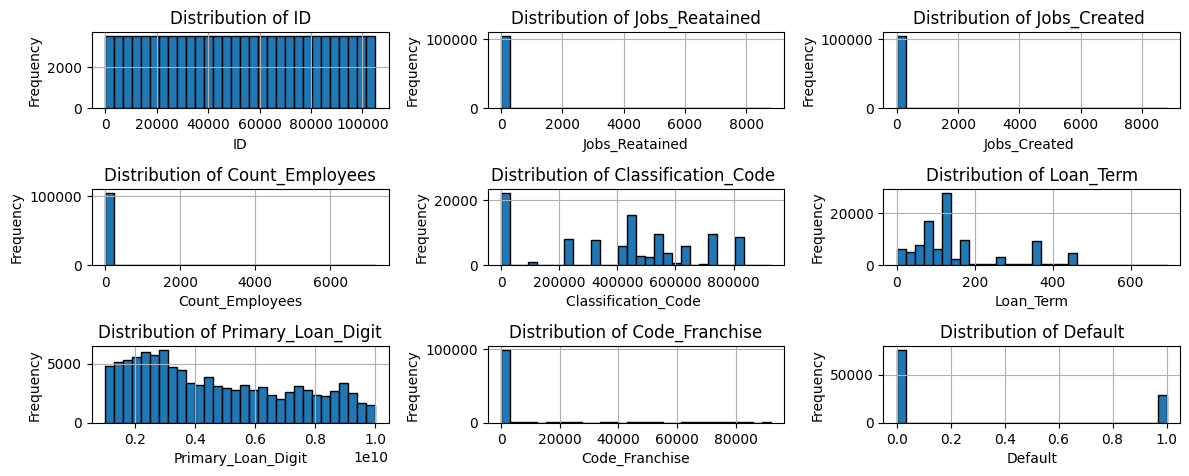

In [10]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 3, i)
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


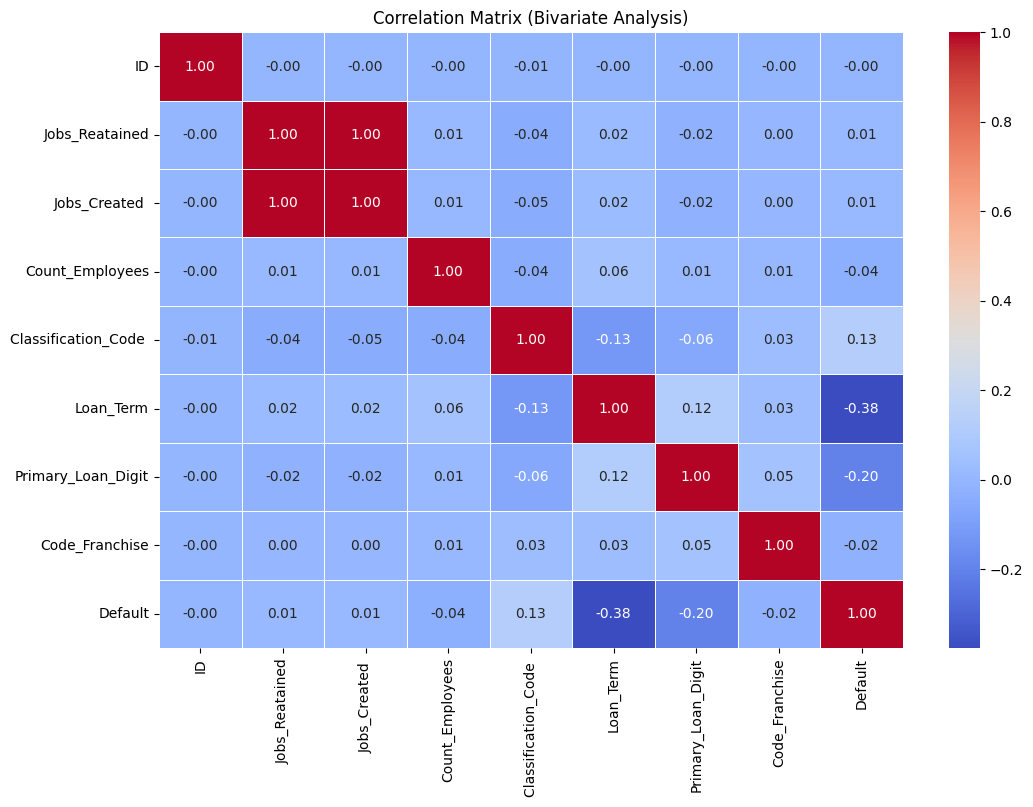

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Bivariate Analysis)")
plt.show()


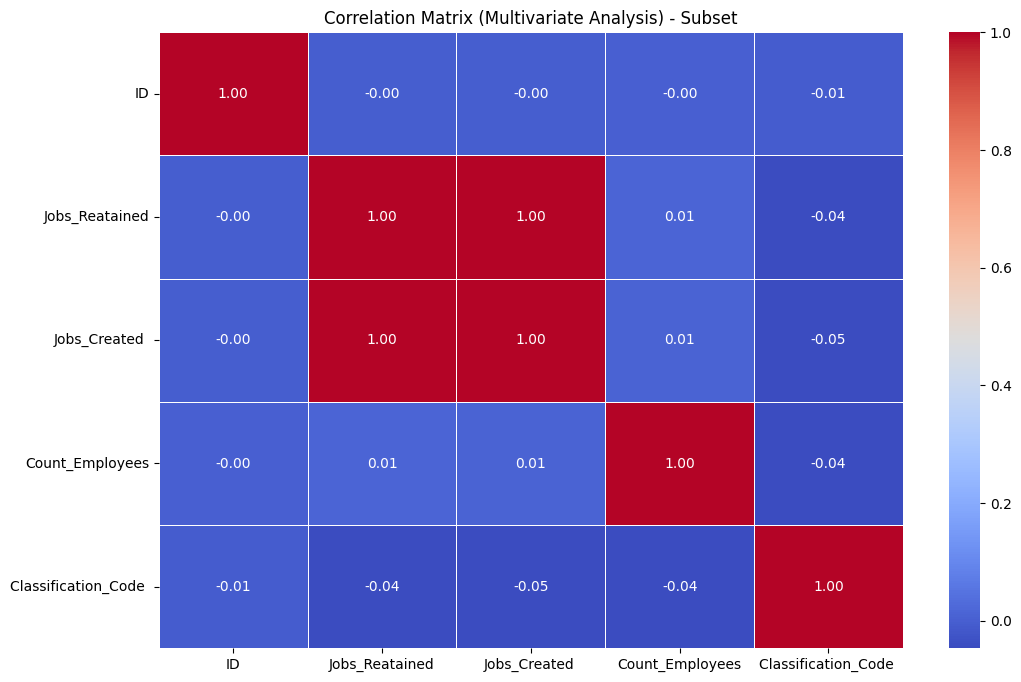

In [12]:
numerical_subset = df.select_dtypes(include=['float64', 'int64']).columns[:5]
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_subset].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix (Multivariate Analysis) - Subset")
plt.show()


In [13]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    min_val = df[col].min()
    max_val = df[col].max()
    range_val = max_val - min_val
    variance_val = df[col].var()
    std_dev = df[col].std()
    coeff_of_var = std_dev / df[col].mean() * 100
    print(f"Column: {col}")
    print(f"Min: {min_val}, Max: {max_val}, Range: {range_val}")
    print(f"Variance: {variance_val}, Standard Deviation: {std_dev}, Coefficient of Variation: {coeff_of_var}%")
    print("-" * 30)


Column: ID
Min: 0, Max: 104999, Range: 104999
Variance: 918758750.0, Standard Deviation: 30311.03346967899, Coefficient of Variation: 57.735851712262%
------------------------------
Column: Jobs_Reatained
Min: 0, Max: 8800, Range: 8800
Variance: 73194.15618499185, Standard Deviation: 270.544185272927, Coefficient of Variation: 2132.17510167749%
------------------------------
Column: Jobs_Created 
Min: 0, Max: 8800, Range: 8800
Variance: 73084.17446814312, Standard Deviation: 270.34084868577133, Coefficient of Variation: 2604.628568545292%
------------------------------
Column: Count_Employees
Min: 0, Max: 7200, Range: 7200
Variance: 3382.243195702453, Standard Deviation: 58.157056284705924, Coefficient of Variation: 587.1930763610922%
------------------------------
Column: Classification_Code 
Min: 0, Max: 928120, Range: 928120
Variance: 67774814029.92237, Standard Deviation: 260335.96376590457, Coefficient of Variation: 64.13506388437453%
------------------------------
Column: Loan_Te

In [14]:
# Skewness and Kurtosis for numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"Column: {col}")
    print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")
    print("-" * 30)


Column: ID
Skewness: 0.0, Kurtosis: -1.1999999999999995
------------------------------
Column: Jobs_Reatained
Skewness: 32.33974674922663, Kurtosis: 1046.862795116572
------------------------------
Column: Jobs_Created 
Skewness: 32.41464157018509, Kurtosis: 1050.7280546128925
------------------------------
Column: Count_Employees
Skewness: 68.07915191198614, Kurtosis: 5925.380031456096
------------------------------
Column: Classification_Code 
Skewness: -0.29628832858165, Kurtosis: -0.9828904991037075
------------------------------
Column: Loan_Term
Skewness: 1.207776721123006, Kurtosis: 0.4728179899152578
------------------------------
Column: Primary_Loan_Digit
Skewness: 0.42977430360466035, Kurtosis: -1.0599093308467602
------------------------------
Column: Code_Franchise
Skewness: 5.025109011824866, Kurtosis: 24.929615231473235
------------------------------
Column: Default
Skewness: 0.9956163683653199, Kurtosis: -1.008767262020385
------------------------------


Covariance Matrix:
                                ID  Jobs_Reatained  Jobs_Created   \
ID                    9.187588e+08   -2.210333e+04  -2.251382e+04   
Jobs_Reatained       -2.210333e+04    7.319416e+04   7.292628e+04   
Jobs_Created         -2.251382e+04    7.292628e+04   7.308417e+04   
Count_Employees      -1.310557e+02    2.050770e+02   1.520024e+02   
Classification_Code  -4.790733e+07   -3.147373e+06  -3.284851e+06   
Loan_Term            -3.835359e+03    6.316884e+02   7.018121e+02   
Primary_Loan_Digit   -2.415184e+11   -1.697333e+10  -1.624836e+10   
Code_Franchise       -1.333077e+06    1.385079e+03   6.580006e+03   
Default              -6.341013e-01    1.749108e+00   1.718458e+00   

                      Count_Employees  Classification_Code      Loan_Term  \
ID                      -1.310557e+02         -4.790733e+07 -3.835359e+03   
Jobs_Reatained           2.050770e+02         -3.147373e+06  6.316884e+02   
Jobs_Created             1.520024e+02         -3.284851e+06

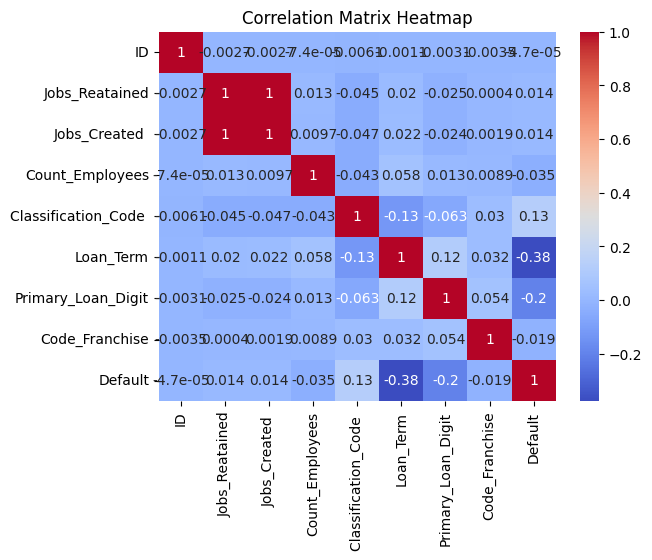

In [15]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Covariance Matrix
cov_matrix = numerical_columns.cov()
print("Covariance Matrix:")
print(cov_matrix)

# Correlation Matrix
corr_matrix = numerical_columns.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Heatmap for Correlation Matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()
